# 3-6. 프로젝트: 고양이 수염 스티커 만들기

# Step 1. 스티커 구하기 or 만들기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("끝")

끝


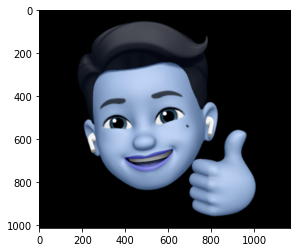

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/손승우미모지.png'
img_bgr = cv2.imread(my_image_path, 1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()


# Step 2. 얼굴 검출 & 랜드마크 검출 하기

* 얼굴 검출

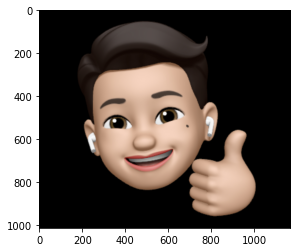

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
#detector_hog를 이용해서 얼굴의 bounding box를 추출

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(245, 348) (707, 811)]]


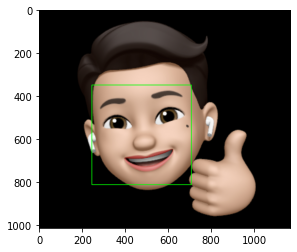

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* 랜드마크 검출


In [7]:
# landmark 모델을 불러옵니다.

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


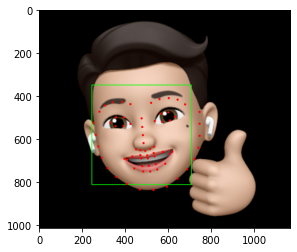

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 0, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3. 스티커 적용 위치 확인하기

In [10]:
#코의 중심점
#박스의 크기 = 왕관의 크기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(485, 618)
(x,y) : (485,618)
(w,h) : (463,463)


(463, 463, 3)


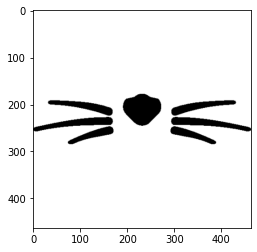

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()


In [12]:
refined_x = x - w // 2
refined_y = y - h //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,387)


In [13]:
# 원본 이미지의 범위를 벗어난 스티커 부분을 제거

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,387)


# Step 4. 스티커 적용하기

(463, 463, 3)


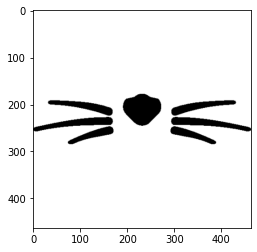

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
# 255로 바꿔야 하는 이유 -> 보통 0이 하얀색이나 cv2.open으로 인해 255가 하얀색이다
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()
np.array(img_sticker)
# np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

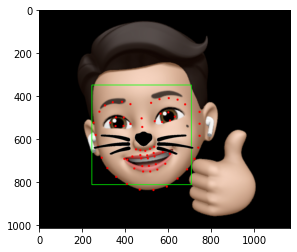

In [15]:
# 원본 이미지에 스티커를 적용합니다.

# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다

#img_show 박스리스트와 랜드마크

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
#     np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


# np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8) // 

# np.where
# a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
# np.where(a >= 10, 0, a)
# array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])
# 10보다 크거나 같은 값은 0으로 바뀌고 , 아닌 값은 그대로 둔다.


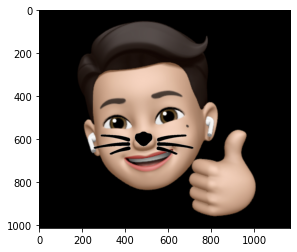

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()

## 5. 여러 종류의 이미지 테스트

* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
* 멀리서 촬영하면 왜 안될까요? 
* 옆으로 누워서 촬영하면 왜 안될까요?

얼굴 각도 변환

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib


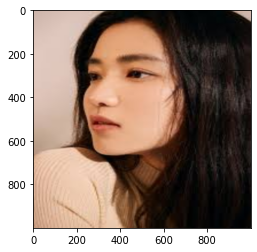

rectangles[[(110, 110) (664, 665)]]


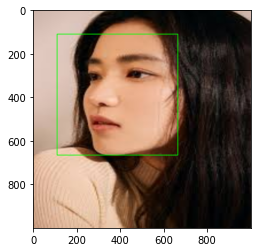

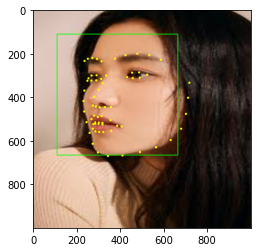

In [18]:
# 원본 이미지 불러오기
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/손승우미모지.png'
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/rotate.png'

img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (1000, 1000))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb = cv2.resize(img_rgb, (1000, 1000))
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

# 이미지 위에 얼굴의 box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark 모델 불러오기
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

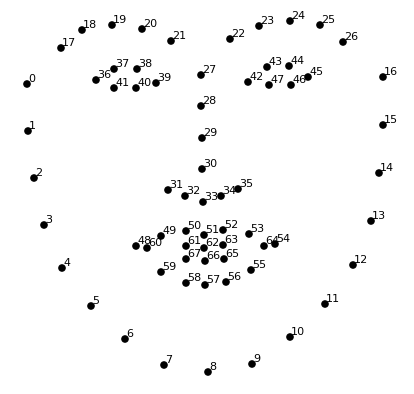

### 영상의 회전 - cv2.getRotationMatrix2D


cv2.getRotationMatrix2D(center, angle, scale) -> retval


+ center: 회전 중심 좌표. (x, y) 튜플
+ angle : (반시계 방향) 회전 각도(degree). 음수는 시계 방향.
+ scale: 추가적인 확대 비율
+ retval: 2x3 어파인 변환 행렬

degree:  3.8460300900474285
(281, 398)
(x, y): (4, 121)
(w, h): (555, 555)


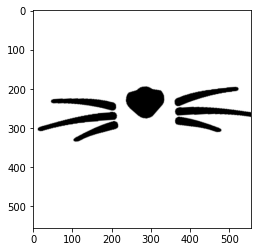

In [19]:
# 이미지 속 인물의 얼굴이 틀어진 각도 계산
import math

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_tilt = abs(landmark[42][0] - landmark[39][0])
    y_tilt = abs(landmark[42][1] - landmark[39][1])
    z_tilt = math.sqrt(x_tilt ** 2 + y_tilt ** 2)
    degree_tilt = math.degrees(math.acos(x_tilt / z_tilt)) #반시계방향
    
    print('degree: ', degree_tilt)

# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0] - dlib_rect.width() // 2
    y = landmark[30][1] - dlib_rect.width() // 2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

# 스티커 이미지를 읽어와서 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

tilt = cv2.getRotationMatrix2D((x, y), degree_tilt, 1)
tilt_sticker = cv2.warpAffine(img_sticker, tilt, (w, h), borderValue=(255,255,255))
tilt_sticker = cv2.resize(tilt_sticker, (w, h))

plt.imshow(tilt_sticker)
plt.show()

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x 
refined_y = y 


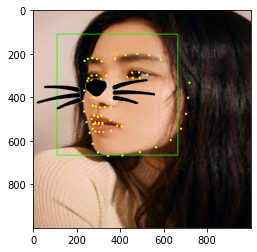

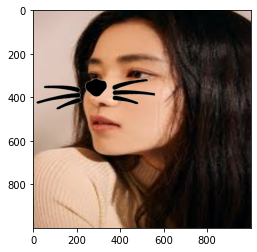

In [20]:
# 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 결과 이미지 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(tilt_sticker==255, sticker_area,tilt_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커 회전
- 스티커 회전 부호에 대한 고려를 못해준게 아쉽다.

클래스를 적용하여 코드를 간단하게 만든 우수자료로 공부해보았다.

# 참고자료 클래스로 정의

In [21]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np


class CatWhiskersSticker:
    """

    Methods:
        show_original_image: 원본 이미지 출력
        show_face_rectangle: 찾은 얼굴 영역을 사각형으로 보여준다
        print_info: 
    """

    detector_hog = dlib.get_frontal_face_detector() # detector 선언

    def __init__(self, img_dir, landmark_model, cat_sticker):
        self.img_bgr = cv2.imread(img_dir)
        self.img_show = self.img_bgr.copy()  # 출력용 이미지 별도 보관
        self.img_rgb = cv2.cvtColor(self.img_bgr, cv2.COLOR_BGR2RGB) # RGB 이미지
        self.dlib_rects = detector_hog(self.img_rgb, 1)
        self.face_points = [] # 얼굴 좌표
        self.landmark_predictor = dlib.shape_predictor(landmark_model)
        self.list_landmarks = [] # 랜드마크 좌표 리스트
        self.nose_points = [] # 30번 랜드마크 위치
        self.face_width_height = [] # 사각형으로 찾은 얼굴의 넓이와 높이
        self.get_face_rectangle()
        self.get_landmarks()
        self.img_sticker = cv2.imread(cat_sticker)
        self.resized_stickers = [] # 리사이즈된 스티커들
        self.resize_sticker()
        self.src_points = [] # 스티커 변환전 좌표
        self.dst_points = [] # 스티커 변환후 좌표
        self.get_src_points()
        self.person_num = len(self.dlib_rects)
        self.get_dst_points()
        # self.perspective_transform_matrix = np.array([])
        # self.get_matrix()


    def put_cat_whiskers(self):
        for i in range(self.person_num):
            transformed_sticker = None
            left, top, _, _ = self.face_points[i]
            width, height = self.face_width_height[i]
            image_sticker = self.resized_stickers[i]

            src = np.float32(self.src_points[i])
            dst = np.float32(self.dst_points[i])
            # print("POINT: ", src, dst)

            matrix = cv2.getPerspectiveTransform(src, dst)
            # print(matrix)

            transformed_sticker = cv2.warpPerspective(image_sticker, matrix, (width, height),
                         borderValue = [255, 255, 255, 255]) # 가장 자리 픽셀 확장은 흰색

            sticker_area = self.img_bgr[top : top + transformed_sticker.shape[0], left : left + transformed_sticker.shape[1]]
            self.img_bgr[top : top + transformed_sticker.shape[0], left : left + transformed_sticker.shape[1]] = \
            np.where(
                transformed_sticker == 0, cv2.addWeighted(transformed_sticker, 0.8, sticker_area, 0.2, 0), sticker_area
            ).astype(np.uint8)

        plt.imshow(cv2.cvtColor(self.img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
        

    def get_src_points(self):
        for w, _ in self.face_width_height:
            src_point = [
                (int(w * 0.46), int(w * 0.4)),
                (int(w * 0.54), int(w * 0.4)),
                (int(w * 0.4), int(w * 0.57)),
                (int(w * 0.6), int(w * 0.57)),
            ]
            self.src_points.append(src_point)
    
    def get_dst_points(self):
        for i in range(self.person_num):
            l, t, _, _ = self.face_points[i]
            landmark = self.list_landmarks[i]

            dst_point = [
                (
                    (landmark[31][0] + landmark[28][0]) // 2 - l,
                    (landmark[31][1] + landmark[28][1]) // 2 - t,
                ),
                (
                    (landmark[35][0] + landmark[28][0]) // 2 - l,
                    (landmark[35][1] + landmark[28][1]) // 2 - t,
                ),
                (
                    (landmark[31][0] + landmark[49][0]) // 2 - l,
                    (landmark[31][1] + landmark[49][1]) // 2 - t,
                ),
                (
                    (landmark[35][0] + landmark[53][0]) // 2 - l,
                    (landmark[35][1] + landmark[53][1]) // 2 - t,
                ),
            ]
            self.dst_points.append(dst_point)
        

    
    def resize_sticker(self):
        for w, h in self.face_width_height:
            resized_sticker = cv2.resize(self.img_sticker, (w, h))
            self.resized_stickers.append(resized_sticker)

    def get_landmarks(self):
        # 랜드마크 위치 구한다
        for dlib_rect in self.dlib_rects:
            points = landmark_predictor(self.img_rgb, dlib_rect)
            list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            self.list_landmarks.append(list_points)

        for dlib_rect, landmark in zip(self.dlib_rects, self.list_landmarks):
            # 랜드마크에서 30번 코의 좌표
            x = landmark[30][0]
            y = landmark[30][1]
            
            # 얼굴 폭과 높이
            w = dlib_rect.width()
            h = dlib_rect.width()

            self.nose_points.append((x, y))
            self.face_width_height.append((w, h))

    def show_landmarks(self):
        # 랜드마크를 영상에 출력
        # self.get_landmarks()
        for landmark in self.list_landmarks:
            for idx, point in enumerate(landmark):
                cv2.circle(self.img_show, point, 3, (0, 255, 255), -1) # yellow
        
        img_show_rgb = cv2.cvtColor(self.img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

            

    def show_original_image(self):
        plt.imshow(self.img_rgb)
        plt.show()

    def get_face_rectangle(self):
        for dlib_rect in self.dlib_rects:
            l = dlib_rect.left()
            t = dlib_rect.top()
            r = dlib_rect.right()
            b = dlib_rect.bottom()

            self.face_points.append((l, t, r, b))


    def show_face_rectangle(self):
        # 찾은 얼굴 영역의 사각형을 그려준다
        for l, t, r, b in self.face_points:
            cv2.rectangle(self.img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
            
        img_show_rgb = cv2.cvtColor(self.img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()

    def show_image_size(self):
        height, width, _ = self.img_bgr.shape
        print(f"이미지 크기: ({height}, {width})")
        print(f"정사각형 얼굴 크기: ({self.face_width_height})")
    
    def print_info(self):
        print("찾은 얼굴 영역 좌표: ", self.dlib_rects) # 찾은 얼굴 영역 좌표
        print("찾은 사람의 수: ", len(self.dlib_rects))
        print(f"랜드마크에서 30번(코) 좌표: ({self.nose_points})")
        print(f"얼굴 크기(Width, Height): ({self.face_width_height})")
        print("SRC POINTS: ", self.src_points)
        print("DST POINTS: ", self.dst_points)


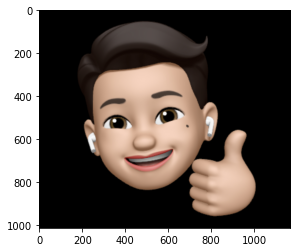

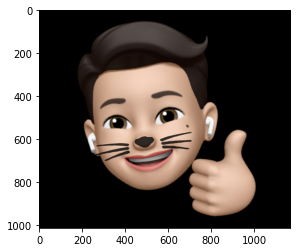

In [22]:
son_image = os.getenv('HOME')+'/aiffel/camera_sticker/images/손승우미모지.png'

# sana_image = "sana.jpg"

son = CatWhiskersSticker(son_image, model_path, sticker_path)
son.show_original_image() # 원본 이미지 출력
son.put_cat_whiskers() # 고양이 수염 스티커 붙인 이미지 출력

In [23]:
img = cv2.imread(son_image) # 이미지 읽어오기

center_point = (img.shape[1] / 2, img.shape[0] / 2) # 회전 중심점은 이미지의 정중앙

# 이미지를 30도씩 회전해서 저장
for i in range(12):
    rot = cv2.getRotationMatrix2D(center_point, i * 30, 1)
    rotated_img = cv2.warpAffine(img, rot, (0, 0))
    cv2.imwrite(f"rotated_iu({i}).png", rotated_img)

DEGREE:  0


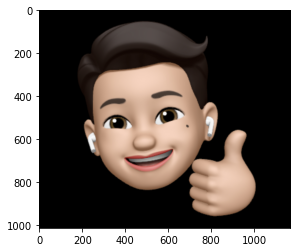

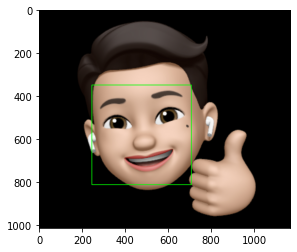

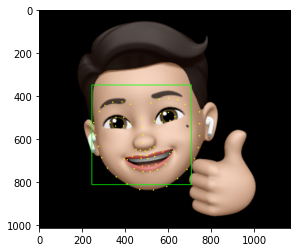

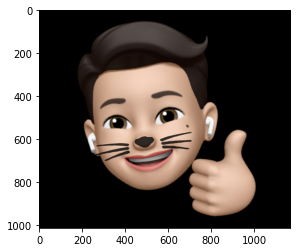

DEGREE:  30


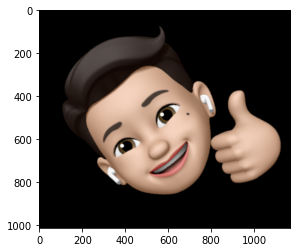

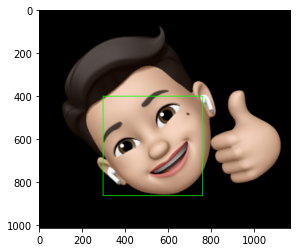

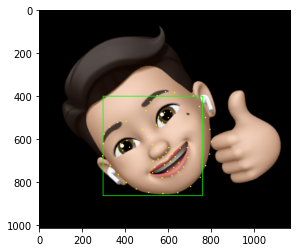

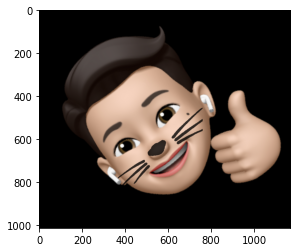

DEGREE:  60


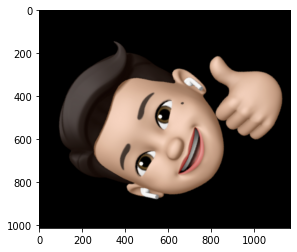

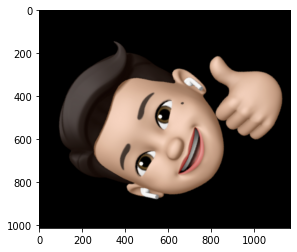

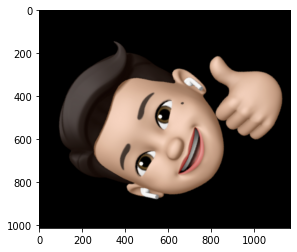

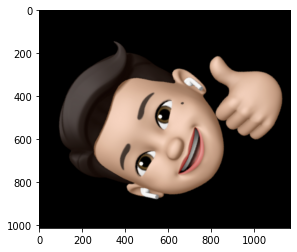

DEGREE:  90


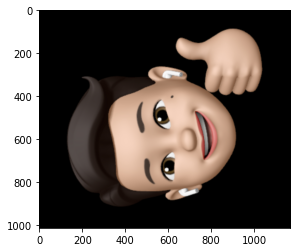

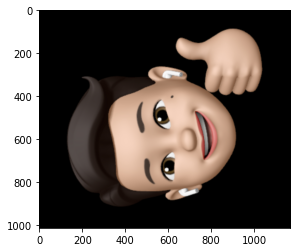

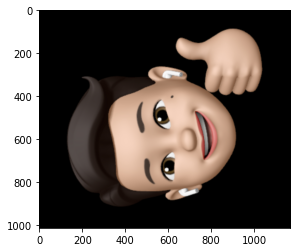

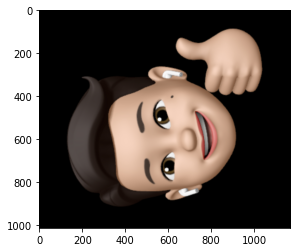

DEGREE:  120


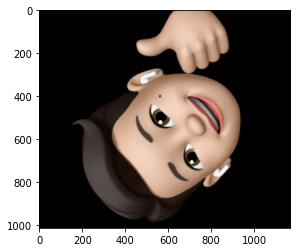

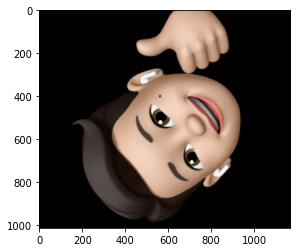

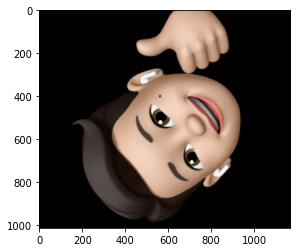

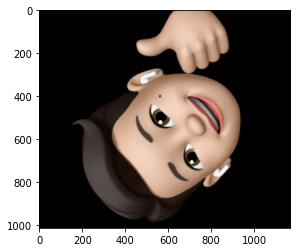

DEGREE:  150


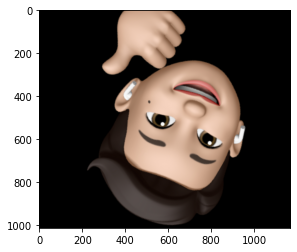

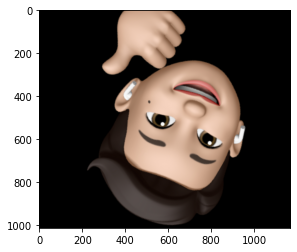

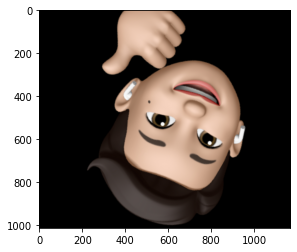

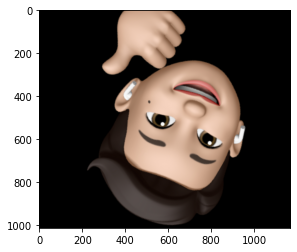

DEGREE:  180


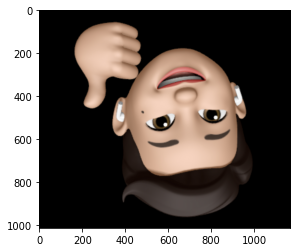

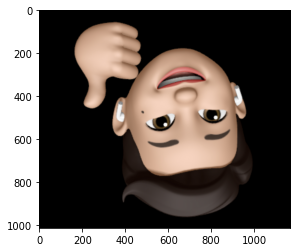

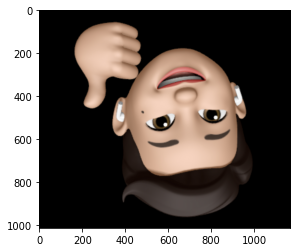

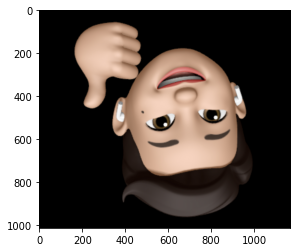

DEGREE:  210


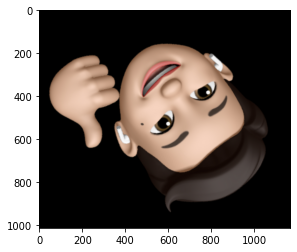

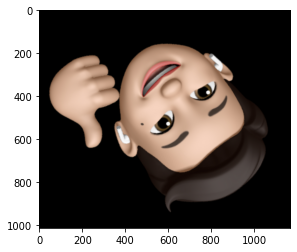

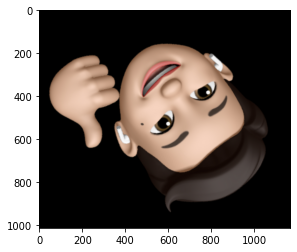

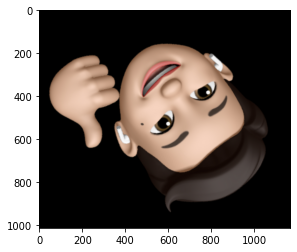

DEGREE:  240


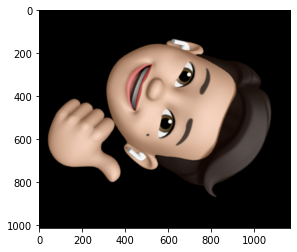

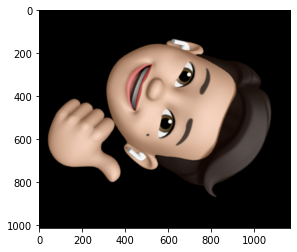

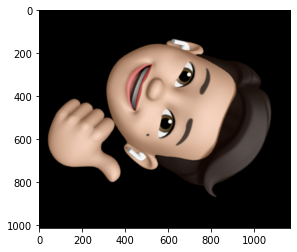

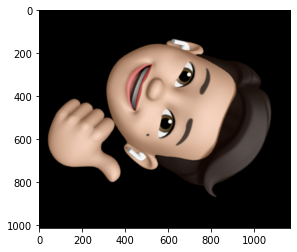

DEGREE:  270


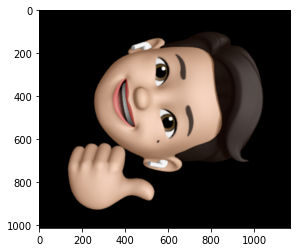

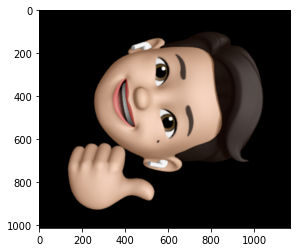

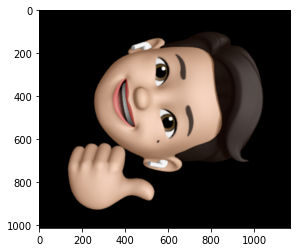

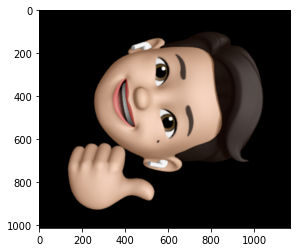

DEGREE:  300


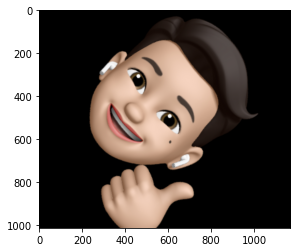

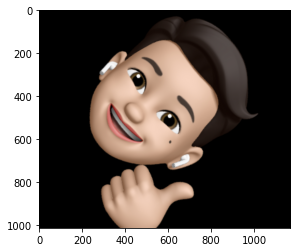

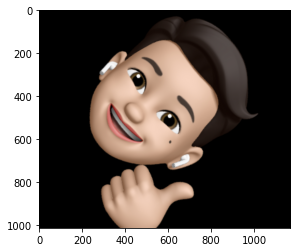

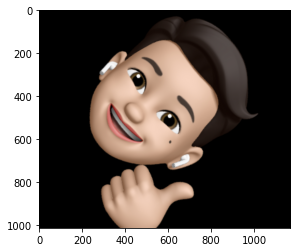

DEGREE:  330


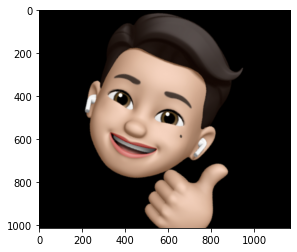

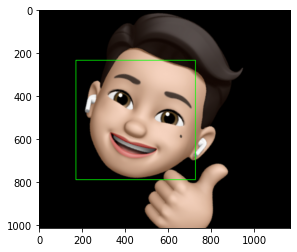

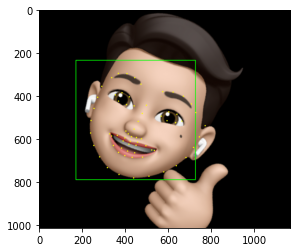

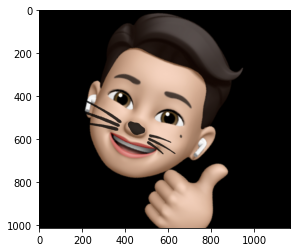

In [24]:
for i in range(12):
    img = f"rotated_iu({i}).png"
    iu = CatWhiskersSticker(img, model_path, sticker_path)
    print("DEGREE: ", i * 30)
    iu.show_original_image()
    iu.show_face_rectangle()
    iu.show_landmarks()
    iu.put_cat_whiskers()
    print("=" * 30)